In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ---------------------------------- OBS POINT ----------------------------------

In [2]:
# Obs Point File Reading
obs_columns = ['x', 'y', 'mag', 'pos_err', 'mag_err', 'td', 'td_err', 'parity']
first_row_columns = ['id', 'n_img', 'zs', 'zs_err']
obs_point = pd.read_csv('Test/obs_point+flux.dat', skiprows=1, header=None, names=obs_columns, delim_whitespace=True)
first_row = pd.read_csv('Test/obs_point+flux.dat', nrows=1, header=None, names=first_row_columns, delim_whitespace=True)

In [6]:
# Assigning Names to the Images
# Find brightest image
brightest_index = obs_point['mag'].idxmax()
obs_point.at[brightest_index, 'Img'] = 'A'

# Clockwise assignment of names from Img A 
def assign_image_names(df, start_index):
    names = ['A', 'B', 'C', 'D']
    current_name_index = 0
    current_index = start_index
    assigned_indices = {current_index}
    
    while len(assigned_indices) < len(df):
        current_x, current_y = df.at[current_index, 'x'], df.at[current_index, 'y']
        next_index = None
        min_angle = float('inf')
        
        for i in range(len(df)):
            if i in assigned_indices:
                continue
            dx = df.at[i, 'x'] - current_x
            dy = df.at[i, 'y'] - current_y
            angle = np.arctan2(dy, dx)
            if angle < min_angle:
                min_angle = angle
                next_index = i
        
        if next_index is not None:
            current_name_index += 1
            df.at[next_index, 'Img'] = names[current_name_index]
            assigned_indices.add(next_index)
            current_index = next_index

assign_image_names(obs_point, brightest_index)


In [7]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,0.187,-0.563,1.00,0.005,0.02,0.0,0.0,0.0,A
1,0.440,-0.348,0.75,0.005,0.02,0.0,0.0,0.0,B
2,0.023,0.865,0.31,0.005,0.02,0.0,0.0,0.0,C
3,-0.548,-0.179,0.28,0.005,0.01,0.0,0.0,0.0,D


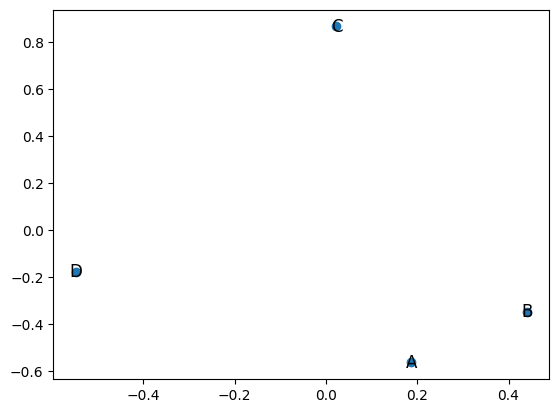

In [11]:
plt.scatter(obs_point['x'], obs_point['y'])
for i, row in obs_point.iterrows():
    plt.text(row['x'], row['y'], row['Img'], fontsize=12, ha='center', va='center')